<a href="https://colab.research.google.com/github/kiboiWanjohi/scotep-kenya/blob/main/histopathology/histopathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [5]:
! cp /content/drive/MyDrive/Stat_Docs/kaggle.json ~/.kaggle/kaggle.json

In [6]:
# Change permission
! chmod 600 ~/.kaggle/kaggle.json

### Download Histopathology Dataset

Link To Breast Histopathology Dataset [Here](https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images)

In [10]:
#!/bin/bash
! kaggle datasets download paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [02:03<00:00, 32.6MB/s]
100% 3.10G/3.10G [02:03<00:00, 26.9MB/s]


In [11]:
# unzip content
! unzip /content/breast-histopathology-images.zip -d /content/breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/breast-

In [12]:
# check disk usage
! df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   40G   69G  37% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  124K  6.4G   1% /var/colab
/dev/sda1        77G   58G   20G  75% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.9G   13G  19% /content/drive


In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
import warnings
import PIL
import random
import plotly.express as px

In [ ]:
image_dir = 'content/jpeg'

In [14]:
breast_imgs = glob.glob('/content/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)
for imgname in breast_imgs[:5]:
    print(imgname)


/content/breast-histopathology-images/IDC_regular_ps50_idx5/16165/0/16165_idx5_x2051_y301_class0.png
/content/breast-histopathology-images/IDC_regular_ps50_idx5/16165/0/16165_idx5_x2651_y501_class0.png
/content/breast-histopathology-images/IDC_regular_ps50_idx5/16165/0/16165_idx5_x1501_y651_class0.png
/content/breast-histopathology-images/IDC_regular_ps50_idx5/16165/0/16165_idx5_x651_y701_class0.png
/content/breast-histopathology-images/IDC_regular_ps50_idx5/16165/0/16165_idx5_x2301_y451_class0.png


In [15]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)

    elif img[-5] == '1' :
        cancer_imgs.append(img)
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer

total_img_num = non_cancer_num + cancer_num

print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))


Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


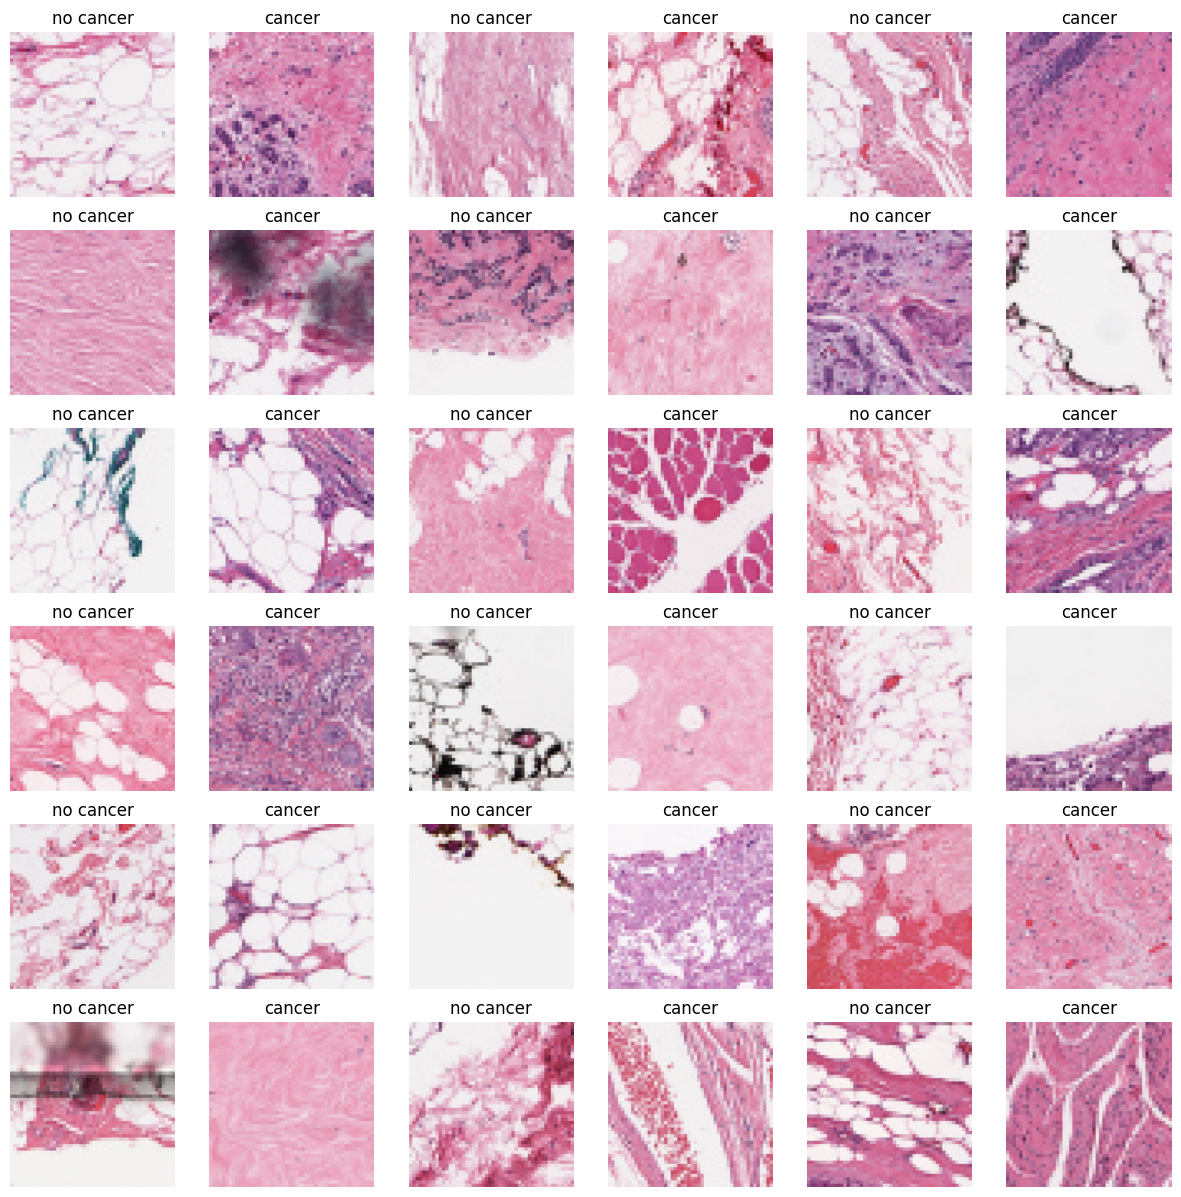

In [17]:
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

s = 0
for num in some_non:

        img = image.load_img((non_cancer_imgs[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:
        img = image.load_img((non_cancer_imgs[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1



In [18]:
# Data Modeling
# Randomly sample images from two lists, 'non_cancer_imgs' and 'cancer_imgs'
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty arrays to store image data and labels
non_img_arr = []  # Array for non-cancer images
can_img_arr = []  # Array for cancer images

# Loop through each image in the 'some_non_img' list
for img in some_non_img:
    # Read the image in color mode
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    if n_img is not None:
        n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)  # Resize the image
        non_img_arr.append((n_img_size, 0))  # Append image and label as a tuple

# Loop through each image in the 'some_can_img' list
for img in some_can_img:
    # Read the image in color mode
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    if c_img is not None:
        c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)  # Resize the image
        can_img_arr.append((c_img_size, 1))  # Append image and label as a tuple

X = []  # List for image data
y = []  # List for labels

# Separate the images and labels
breast_img_arr = non_img_arr + can_img_arr  # Combine the lists
random.shuffle(breast_img_arr)  # Shuffle the combined list
# Split into features (X) and labels (y)
X = [feature for feature, label in breast_img_arr]
y = [label for feature, label in breast_img_arr]

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the 'X' array
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (277524, 50, 50, 3)
y shape: (277524,)


In [19]:
# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a rate (percentage) for subsampling the training data
rate = 0.5

# Calculate the number of samples to keep in the training data based on the rate
num = int(X.shape[0] * rate)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
y_train = to_categorical(y_train, 2)  # Assuming there are 2 classes (non-cancer and cancer)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))


X_train shape : (222019, 50, 50, 3)
X_test shape : (55505, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (55505, 2)


In [1]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [2]:
# Create data generators for training and testing
train_datagen = datagen.flow(X_train, y_train, batch_size=32)
test_datagen = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of monitored quantity
)

NameError: name 'X_train' is not defined

In [ ]:
# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=2,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,  # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=0,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)


In [ ]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

In [ ]:
# Create a Sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 2x2 pool size and default stride (2)
    tf.keras.layers.MaxPooling2D(strides=2),

    # Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Flatten the output to prepare for fully connected layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Output layer with 2 units (binary classification) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
# Display a summary of the model architecture
model.summary()


In [ ]:
# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 25,
                    batch_size = 75,
                    callbacks=[early_stopping, plateau])